# Imports

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline
import time
import matplotlib.pyplot as plt
import scipy
import numpy as np
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import keras_metrics
from keras import layers
from keras import models
from keras import optimizers
from keras import models
from keras import layers
import keras_metrics
from sklearn.model_selection import RandomizedSearchCV 

np.random.seed(123)

Using TensorFlow backend.


In [4]:
test_folder = '../data/test'
train_folder = '../data/train'
val_folder = '../data/val'

In [5]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(256,256), batch_size = 627) 

val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(256,256), batch_size = 19)

train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_folder, 
        target_size=(256,256), batch_size=5219)

Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.


In [6]:
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [7]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

train_y = np.reshape(train_labels[:,0], (5216,1))
test_y = np.reshape(test_labels[:,0], (624,1))
val_y = np.reshape(val_labels[:,0], (16,1))

In [8]:
train_img.shape

(5216, 196608)

# Modeling

In [9]:
model = models.Sequential()

model.add(layers.Conv2D(6, (3, 3), activation='relu',
                        input_shape=(256 ,256,  3)))
model.add(layers.MaxPooling2D((3, 3), strides=3))
model.add(layers.Dropout(0.75))  

model.add(layers.Conv2D(12, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((3, 3), strides=3))
model.add(layers.Dropout(0.05))  

# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))

# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))

# model.add(layers.Conv2D(256, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
#model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


# confusion matrx

In [10]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc',keras_metrics.recall()])

history = model.fit(train_images,
                    train_y,
                    epochs=15,
                    batch_size=32,
                    validation_data=(val_images, val_y),
                    verbose=1)

Train on 5216 samples, validate on 16 samples
Epoch 1/15
5216/5216 [==============================] - 73s 14ms/step - loss: 0.3974 - acc: 0.8217 - recall: 0.4847 - val_loss: 0.5862 - val_acc: 0.7500 - val_recall: 0.5000
Epoch 2/15
5216/5216 [==============================] - 76s 15ms/step - loss: 0.1859 - acc: 0.9241 - recall: 0.8330 - val_loss: 0.5607 - val_acc: 0.6250 - val_recall: 0.2500
Epoch 3/15
5216/5216 [==============================] - 87s 17ms/step - loss: 0.1402 - acc: 0.9444 - recall: 0.8867 - val_loss: 0.5102 - val_acc: 0.6250 - val_recall: 0.2500
Epoch 4/15
5216/5216 [==============================] - 80s 15ms/step - loss: 0.1278 - acc: 0.9544 - recall: 0.9045 - val_loss: 0.4865 - val_acc: 0.6250 - val_recall: 0.2500
Epoch 5/15
5216/5216 [==============================] - 79s 15ms/step - loss: 0.1081 - acc: 0.9613 - recall: 0.9202 - val_loss: 0.5257 - val_acc: 0.6250 - val_recall: 0.2500
Epoch 6/15
5216/5216 [==============================] - 76s 15ms/step - loss: 0.1035

In [11]:
results_train = model.evaluate(train_images, train_y)

5216/5216 [==============================] - 44s 8ms/step


In [12]:
results_test = model.evaluate(test_images, test_y)

624/624 [==============================] - 5s 8ms/step


In [13]:
results_train

[0.2532622461304343, 0.9338573619631901, 0.9127516777842839]

In [14]:
results_test

[0.4845580993554531, 0.7852564102564102, 0.5042735040580028]

In [ ]:
results_test

In [15]:
history.history['recall']

[0.4847129007841378,
 0.8329604771936644,
 0.8866517523574458,
 0.9045488440787062,
 0.9202087993348091,
 0.9202087993348091,
 0.915734526404494,
 0.9403430275212271,
 0.9395973153661746,
 0.9313944816605969,
 0.9433258761414373,
 0.9410887396762797,
 0.9522744220020675,
 0.9395973153661746,
 0.9395973153661746]

In [160]:
model.predict_classes(val_images)

array([[0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0]], dtype=int32)

In [161]:
val_labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [26]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.0, nesterov=False),
              metrics=[keras_metrics.recall()])

history = model.fit(train_images,
                    train_y,
                    epochs=25,
                    batch_size=64,
                    validation_data=(val_images, val_y),
                    verbose=1)

Train on 5216 samples, validate on 16 samples
Epoch 1/25
 768/5216 [===>..........................] - ETA: 1:32 - loss: 0.7138 - recall: 1.0000

KeyboardInterrupt: 

In [111]:
#history.history['precision']

In [96]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=0.1, momentum=0.0, nesterov=False),
              metrics=[keras_metrics.recall()])

In [97]:
history = model.fit(train_images,
                    train_y,
                    epochs=25,
                    batch_size=32,
                    validation_data=(val_images, val_y),
                    verbose=2)

ValueError: Error when checking input: expected dense_31_input to have 2 dimensions, but got array with shape (5216, 64, 64, 3)

In [105]:
results_train = model.evaluate(train_images, train_y)

ValueError: Error when checking input: expected dense_51_input to have 2 dimensions, but got array with shape (5216, 64, 64, 3)

In [101]:
results_test = model.evaluate(test_images, test_y)

ValueError: Error when checking input: expected dense_41_input to have 2 dimensions, but got array with shape (624, 64, 64, 3)

In [86]:
results_train

[0.027672075449726174, 0.9992542877703762]

In [87]:
results_test

[1.213027333601927, 0.40170940153773105]

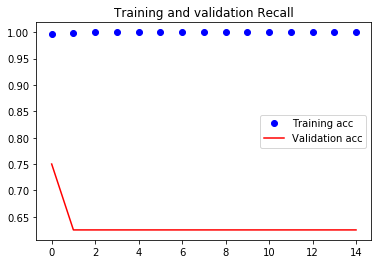

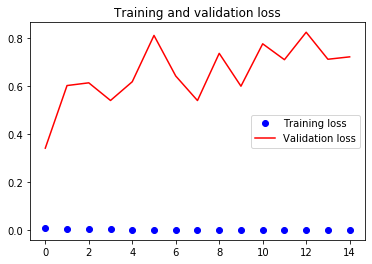

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline 

rec = history.history['recall']
val_rec = history.history['val_recall']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(rec))
plt.plot(epochs, rec, 'bo', label='Training acc')
plt.plot(epochs, val_rec, 'r', label='Validation acc')
plt.title('Training and validation Recall')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [66]:
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu',
                        input_shape=(128,128,  3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=[keras_metrics.precision(), keras_metrics.recall()])

In [67]:
history = model.fit(train_images,
                    train_y,
                    epochs=1,
                    batch_size=32,
                    validation_data=(val_images, val_y),
                    verbose=1)

Train on 5216 samples, validate on 16 samples
Epoch 1/1
5216/5216 [==============================] - 44s 8ms/step - loss: 0.5778 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.7966 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00


In [68]:
results_train = model.evaluate(train_images, train_y)

5216/5216 [==============================] - 15s 3ms/step


In [69]:
results_test = model.evaluate(test_images, test_y)

624/624 [==============================] - 2s 3ms/step


In [70]:
results_train

[0.5725939910104669, 0.0, 0.0]

In [71]:
results_test

[0.6894019811581342, 0.0, 0.0]

In [72]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 60, 60, 32)        8224      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 12544)             0         
__________